In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import load_img,img_to_array


In [ ]:
#conect drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#create data
drive.mount('/content/drive',force_remount=True)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FOOD',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/FOOD',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode ='categorical')

Mounted at /content/drive
Found 30 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [ ]:
#create model
model=Sequential()

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))

model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 100,
                  epochs=50,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 2.7806 - accuracy: 0.1000 - val_loss: 4.0152 - val_accuracy: 0.1000
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 4.0435 - accuracy: 0.1000 - val_loss: 2.9503 - val_accuracy: 0.1000
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 2.9065 - accuracy: 0.1000 - val_loss: 2.3158 - val_accuracy: 0.1333
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 2.3213 - accuracy: 0.1000 - val_loss: 2.2316 - val_accuracy: 0.2000
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 2.2373 - accuracy: 0.1000 - val_loss: 2.2333 - val_accuracy: 0.1000
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 2.2481 - accuracy: 0.1000 - val_loss: 2.2192 - val_accuracy: 0.2667
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 2.2283 - accuracy: 0.1667 - val_loss: 2.1323 - val_accuracy: 0.3333
Epoch 8/50
1/1 [=========================

In [ ]:
model.save('BTVN-CNN-FOOD.h5')

In [ ]:
label = ['BanhMi','BanhXeo','BunBo','MiQuang','BunThitNuong','ComSuon','Goi','GoiCuon','Nem','Pho']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Test loss=  0.09408795833587646
Test accuracy=  0.9666666388511658


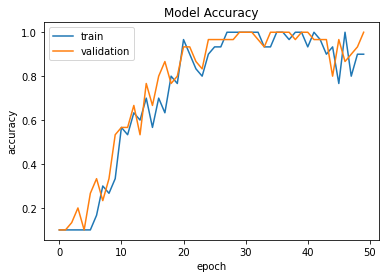

In [ ]:
import matplotlib.pyplot as plt
score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

In [ ]:
from keras.models import load_model
model = load_model('BTVN-CNN-FOOD.h5')

In [1]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/com suon test.jpg', target_size = (128,128))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,128,128,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

FileNotFoundError: ignored